# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

In [6]:
import pandas as pd
env = pd.read_csv("data/Arrigetch_Peaks_Environmental_Data.csv")
species = pd.read_csv("data/Arrigetch_Peaks_Species_Data.csv")

In [7]:
print(f"Environmental Data has {env.shape[0]} rows and {env.shape[1]} columns")
env.head()

Environmental Data has 439 rows and 11 columns


,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090,45,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920,315,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950,225,-9999,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...


In [10]:
print(f"Species Data has {species.shape[0]} rows and {species.shape[1]} columns")
species.head()

Species Data has 439 rows and 409 columns


,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

In [32]:
import numpy as np

env = env.replace(-9999, np.NaN)
species = species.replace(-9999, np.NaN)

Print how many unique plant community names there are. (1 pt)

In [33]:
print(f"There are {len(env['PLANT_COMMUNITY_NAME'].unique())} unique plant community names.")

There are 51 unique plant community names.


Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

In [34]:
env.iloc[:, 1:].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

In [35]:
merged_data = env.merge(species, left_on="TURBOVEG_PLOT_NUMBER", right_on="TURBOVEG_PLOT_NUMBER")
merged_data.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090.0,45.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920.0,315.0,NaN,0,0,0,0,0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940.0,270.0,NaN,0,0,0,0,0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950.0,225.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935.0,270.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


How many rows in the merged data frame contain missing data? (1 pt)

In [50]:
print(f"{sum(merged_data.isnull().any(axis=1))} rows in the merged data frame contain missing data.")

422 rows in the merged data frame contain missing data.


Which species was present in the most plots? (3 pt)

In [46]:
counts = species[species.columns[1:]].astype(bool).sum()
most_present_species = counts.idxmax()
print(f"The species '{most_present_species}' was present in the most plots - {counts[most_present_species]}.")

The species 'Cetraria islandica' was present in the most plots - 229.


For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

In [66]:
species = species.assign(totals=species.drop("TURBOVEG_PLOT_NUMBER", axis=1).sum(axis=1))
species.head().iloc[:, -10:]

,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,totals
0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,397.5
1,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,505.0
2,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,677.5
3,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,420.0
4,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,422.5


Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

The 'Arrigetch_Peaks_Species_Data.csv' desciption states that the data values are "Species Cover Classes", which are described as having possible values of 'r', '+', and the numbers 1-5. Each possible value describes a range of %cover that the species falls within. It seems that the data set instead contains the actual %cover as data values. If I was able to confirm that this is the case, I could do two things to correct the inconsistency. The first option is to change the description of the data set. The second option is to create a new dataframe with pandas by replacing each value with its corresponding "Species Cover Class" value. My choice would depend on whichever form the data would be more useful and convenient to work with.

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

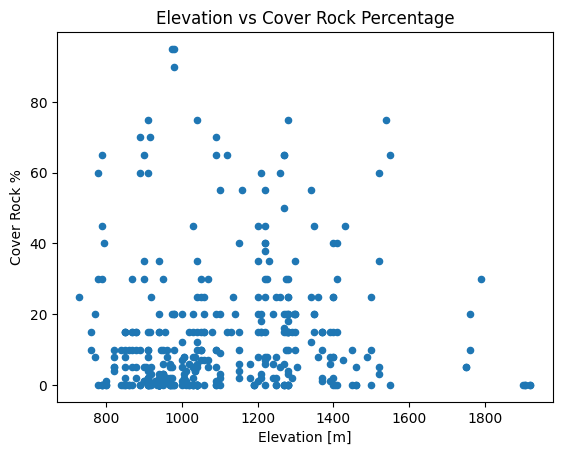

In [122]:
import matplotlib.pyplot as plt

env.plot.scatter(x="ELEVATION", y="COVER_ROCK")
plt.title("Elevation vs Cover Rock Percentage")
plt.xlabel("Elevation [m]")
plt.ylabel("Cover Rock %")
plt.savefig("Elevation_vs_cover_rock")
plt.show()

There appears to be no easily discernable relationship between elevation and cover rock percentage.

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

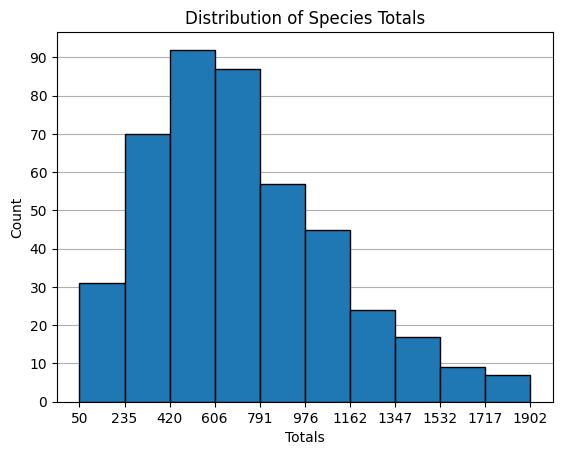

Summary statistics for totals:


count     439.000000
mean      720.732346
std       373.649806
min        50.000000
25%       435.000000
50%       660.000000
75%       941.250000
max      1902.500000
Name: totals, dtype: float64

In [112]:
n, bins, patches = plt.hist(species["totals"], bins=10, edgecolor='black', zorder=2)
plt.title("Distribution of Species Totals")
plt.xlabel("Totals")
plt.ylabel("Count")
plt.xticks(bins)
plt.yticks(np.arange(0,100,10))
plt.grid(axis='y', zorder=-1)
plt.savefig("Totals_histogram")
plt.show()

print("Summary statistics for totals:")
species["totals"].describe()

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

In [110]:
subset_names = ["Caricetum scirpoideae-rupestris","Pedicularo kanei-Caricetum glacialis", "Saxifrago tricuspidatae-Artemisietum alaskanae"]
env_subset = env[env['PLANT_COMMUNITY_NAME'].isin(subset_names)]
print(env_subset["PLANT_COMMUNITY_NAME"].value_counts())

Caricetum scirpoideae-rupestris                   24
Pedicularo kanei-Caricetum glacialis              12
Saxifrago tricuspidatae-Artemisietum alaskanae     6
Name: PLANT_COMMUNITY_NAME, dtype: int64


Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

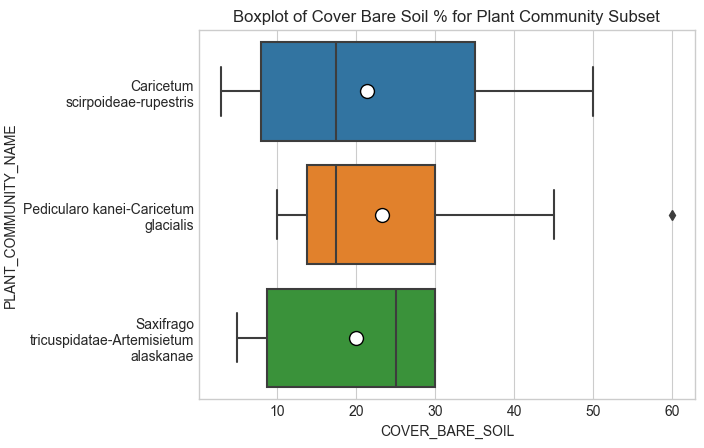

In [176]:
import seaborn as sns

fig, ax = plt.subplots()
bp = sns.boxplot(data=env_subset, x='COVER_BARE_SOIL', y='PLANT_COMMUNITY_NAME', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title("Boxplot of Cover Bare Soil % for Plant Community Subset")
plt.yticks(wrap=True)
plt.show()

'Pedicularo' has the highest mean cover bare soil percentage. 'Cariceturn' and 'Pedicularo' have almost the 

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).